In [1]:
%load_ext autoreload
%autoreload 2
from tf_activation import DeepGraph
from tf_activation.models import mnist_cff as mnist_model

import math
import random
import os

import networkx as nx
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist_map = {
    0: 3,
    1: 2,
    2: 1,
    3: 18,
    4: 4,
    5: 8,
    6: 11,
    7: 0,
    8: 61,
    9: 7
}

SAVE_PATH = '../logdir/models'
ADV_PATH = '../logdir/adversaries'
ELITE_PATH = '../logdir/adversaries'
DATA_PATH = '../logdir/data'

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allocator_type = 'BFC'
config.log_device_placement = True

persistence_module = tf.load_op_library('/home/tgebhart/python/tensorflow/bazel-bin/tensorflow/core/user_ops/nn_graph_persistence.so')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
elite_1  = np.genfromtxt(os.path.join(DATA_PATH, 'persistence_1_elite.csv'), delimiter=',')
adv_1 = np.genfromtxt(os.path.join(DATA_PATH, 'persistence_1_adversary.csv'), delimiter=',')
p_1 = np.genfromtxt(os.path.join(DATA_PATH, 'persistence_3.csv'), delimiter=',')

elite_5  = np.genfromtxt(os.path.join(DATA_PATH, 'persistence_5_elite.csv'), delimiter=',')
adv_5 = np.genfromtxt(os.path.join(DATA_PATH, 'persistence_5_adversary.csv'), delimiter=',')
p_5 = np.genfromtxt(os.path.join(DATA_PATH, 'persistence_5.csv'), delimiter=',')

elite_8  = np.genfromtxt(os.path.join(DATA_PATH, 'persistence_8_elite.csv'), delimiter=',')
adv_8 = np.genfromtxt(os.path.join(DATA_PATH, 'persistence_8_adversary.csv'), delimiter=',')
p_8 = np.genfromtxt(os.path.join(DATA_PATH, 'persistence_8.csv'), delimiter=',')

In [4]:
def filteryx(row):
    return row[0] <= row[1]

In [5]:
bool_arr = np.array([filteryx(row) for row in elite_1])
yx_elite_1 = elite_1[bool_arr]

bool_arr = np.array([filteryx(row) for row in adv_1])
yx_adv_1 = adv_1[bool_arr]

bool_arr = np.array([filteryx(row) for row in p_1])
yx_p_1 = p_1[bool_arr]

bool_arr = np.array([filteryx(row) for row in elite_5])
yx_elite_5 = elite_5[bool_arr]

bool_arr = np.array([filteryx(row) for row in adv_5])
yx_adv_5 = adv_5[bool_arr]

bool_arr = np.array([filteryx(row) for row in p_5])
yx_p_5 = p_5[bool_arr]

bool_arr = np.array([filteryx(row) for row in elite_8])
yx_elite_8 = elite_8[bool_arr]

bool_arr = np.array([filteryx(row) for row in adv_8])
yx_adv_8 = adv_8[bool_arr]

bool_arr = np.array([filteryx(row) for row in p_8])
yx_p_8 = p_8[bool_arr]


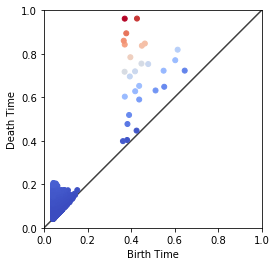

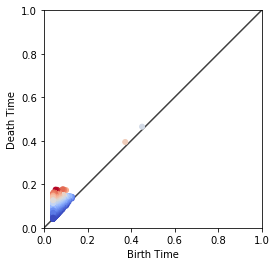

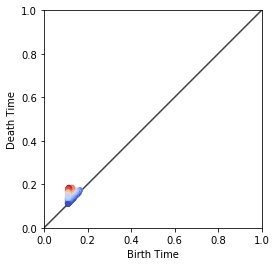

In [6]:
ijk = [yx_elite_1, yx_adv_1, yx_p_1]
for yx in ijk:
    fig, ax = plt.subplots()
    ax.scatter(yx[:,0], yx[:,1], s=25, c=yx[:,1]**2 - yx[:,0]**2, cmap=plt.cm.coolwarm, zorder=10)
    lims = [
        np.min([0, 1]),  # min of both axes
        np.max([0, 1]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    plt.xlabel('Birth Time')
    plt.ylabel('Death Time')
plt.show()

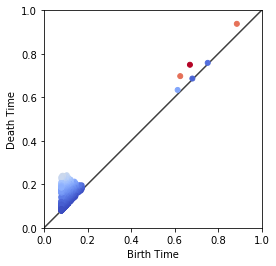

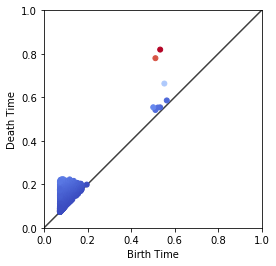

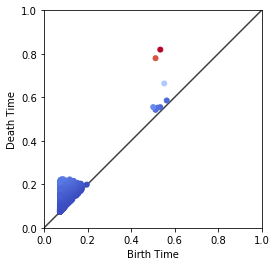

In [7]:
ijk = [yx_elite_5, yx_adv_5, yx_p_5]
for yx in ijk:
    fig, ax = plt.subplots()
    ax.scatter(yx[:,0], yx[:,1], s=25, c=yx[:,1]**2 - yx[:,0]**2, cmap=plt.cm.coolwarm, zorder=10)
    lims = [
        np.min([0, 1]),  # min of both axes
        np.max([0, 1]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    plt.xlabel('Birth Time')
    plt.ylabel('Death Time')
plt.show()

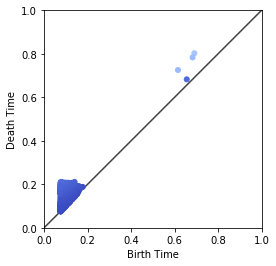

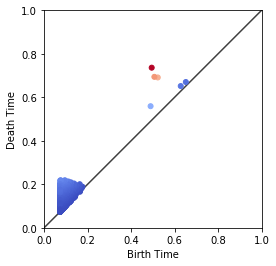

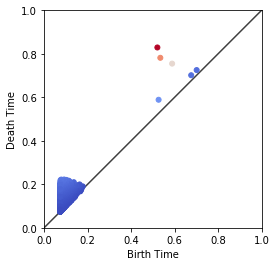

In [8]:
ijk = [yx_elite_8, yx_adv_8, yx_p_8]
for yx in ijk:
    fig, ax = plt.subplots()
    ax.scatter(yx[:,0], yx[:,1], s=25, c=yx[:,1]**2 - yx[:,0]**2, cmap=plt.cm.coolwarm, zorder=10)
    lims = [
        np.min([0, 1]),  # min of both axes
        np.max([0, 1]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    plt.xlabel('Birth Time')
    plt.ylabel('Death Time')
plt.show()